# 0. Bibliotecas

In [1]:
# mover os imports para cá

# 1. Datasets

In [2]:
# carregar todos os datasets aqui

# 2. Pré-processamento dos dados

Uma vez que vamos trabalhar apenas com pontos no plano cartesiano, precisamos transformar nossos dados em uma **matriz bidimensional**. Para isso, utilizaremos a técnica **SVD** (Singular Value Decomposition) que reduz uma matriz *n*-dimensional em uma matriz *k*-dimensional, onde *k* é o número de fatores latentes. Para nosso trabalho, *k* é sempre 2.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris() # apenas o iris tem duas classes linearmente separáveis
digits = datasets.load_digits()
wine = datasets.load_wine()
cancer = datasets.load_breast_cancer()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = pd.DataFrame(iris.target)


In [4]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=4, random_state=42)
data_points = svd.fit_transform(df)

In [5]:
df_new = pd.DataFrame(data_points, columns=['x','y'])
df_new['Target'] = pd.DataFrame(iris.target)
df_new

,x,y,Target
0,5.847277,2.461922,0
1,5.511162,2.138145,0
2,5.386715,2.244409,0
3,5.376754,2.035803,0
4,5.810511,2.483696,0
...,...,...,...
145,9.419625,-1.095265,2
146,8.766359,-1.230153,2
147,9.220995,-1.063022,2
148,9.300111,-1.164300,2


# 3. Envoltória Convexa

In [6]:
# classe para representar pontos bidimensionais no espaço
class Ponto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [7]:
#calculando o produto vetorial entre segmentos ab e ac, a = ancora
def produto_vetorial(ancora, b, c):
    return ((b.x-ancora.x)*(c.y-ancora.y) - (c.x-ancora.x)*(b.y-ancora.y))


In [8]:
# encontrando o ponto mais embaixo em relação a y
def mais_a_esquerda(pontos):
    min = 0
    for i in range(1,len(pontos)):
        if pontos[i].y < pontos[min].y:
            min = i
        elif pontos[i].y == pontos[min].y:
            if pontos[i].x < pontos[min].x: # em caso de empate, escolhemos o ponto mais a esquerda
                min = i
    return min

In [9]:
# funcao que recebe um vetor de pontos, e retorna lista com pontos da envoltoria convexa
def gift_wrapping(pontos):
    i_esquerda = mais_a_esquerda(pontos) # guarda indice do ponto mais a esquerda
    p = pontos[i_esquerda]

    prox = (i_esquerda + 1) % len(pontos)

    teste = (prox + 1) % len(pontos)

    envoltoria = [] #incializa envoltoria vazia
    envoltoria.append(p) # adiciona ponto mais à esquerda a envoltoria

    q = p
    while(True):
        while(teste != len(pontos)):

            det = produto_vetorial(q, pontos[prox], pontos[teste])
            if det < 0: # se for negativo, pontos[teste] tem o menor angulo polar
                prox = teste
            teste = teste+1;

        # se tivermos retornados a ancora, loop acaba
        if p == pontos[prox]:
            break
        # se 
        elif teste == len(pontos):
            teste = 0;

        # adiciona ponto a envoltoria
        envoltoria.append(pontos[prox])
        # atualiza variáveis
        q = pontos[prox]
        prox = (prox + 1) % len(pontos)
        #teste = 0
    return envoltoria

In [10]:
list = [1,2,3,4,5]
print(list[0])
print(len(list))


1
5


In [12]:
pontos = [Ponto(x, y) for x, y in data_points]
for i in range(len(pontos)):
    if pontos[i].x>11:
        print({pontos[i].x}, {pontos[i].y}, i)
    
envoltoria = gift_wrapping(pontos)

{11.209520246188216} {-1.2779709890842166} 117
{11.17195125012532} {-0.965994157392016} 131
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
{11.17195125012532}
4.007015036838179


In [13]:
list = [0,1,2,3,4,5,6]
print(len(list))
list[7]

7


IndexError: list index out of range

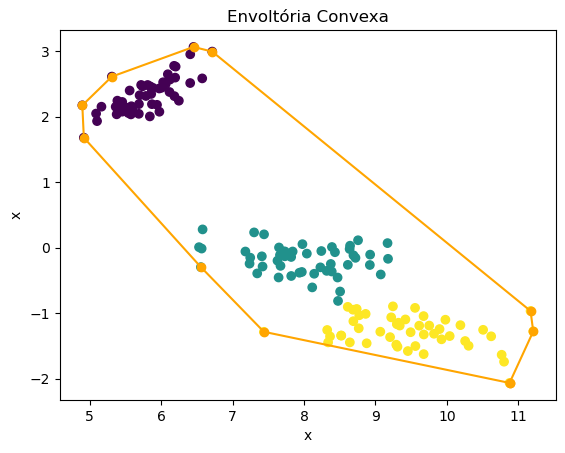

In [14]:
# Criando listas separadas para nomes e idades
Xs1 = [ponto.x for ponto in pontos]
Ys1 = [ponto.y for ponto in pontos]

Xs2 = [ponto.x for ponto in envoltoria]
Ys2 = [ponto.y for ponto in envoltoria]

# Adicionando o primeiro ponto da envoltória ao final para fechar a forma
Xs2.append(envoltoria[0].x)
Ys2.append(envoltoria[0].y)

# Plotando um gráfico de barras
plt.scatter(Xs1, Ys1, c=iris.target)
plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')
plt.xlabel('x')
plt.ylabel('x')
plt.title('Envoltória Convexa')
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_1312\3564467337.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label = (iris.target).astype(np.int)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{11.17195125012532}
4.007015036838179


<Figure size 640x480 with 0 Axes>

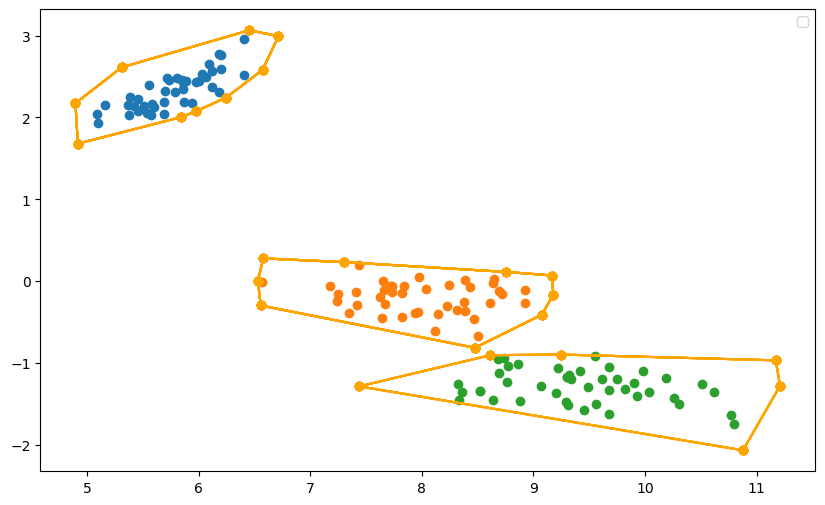

In [15]:
# testando envoltoria com a matriz bidimensional
plt.clf()
plt.figure(figsize = (10, 6))
names = iris.target_names
label = (iris.target).astype(np.int)
colors = ['b','r','g']
for i in range(len(names)):
    bucket = df_new[df_new['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    bucket_points = [Ponto(x, y) for x, y in bucket]
    envoltoria = gift_wrapping(bucket_points)
    Xs1 = [ponto.x for ponto in bucket_points]
    Ys1 = [ponto.y for ponto in bucket_points]
    plt.scatter(Xs1, Ys1)
    Xs2 = [ponto.x for ponto in envoltoria]
    Ys2 = [ponto.y for ponto in envoltoria]
    Xs2.append(envoltoria[0].x)
    Ys2.append(envoltoria[0].y)
    for j in envoltoria:
        plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')
plt.legend()
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_1312\4025008769.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label = (iris.target).astype(np.int)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

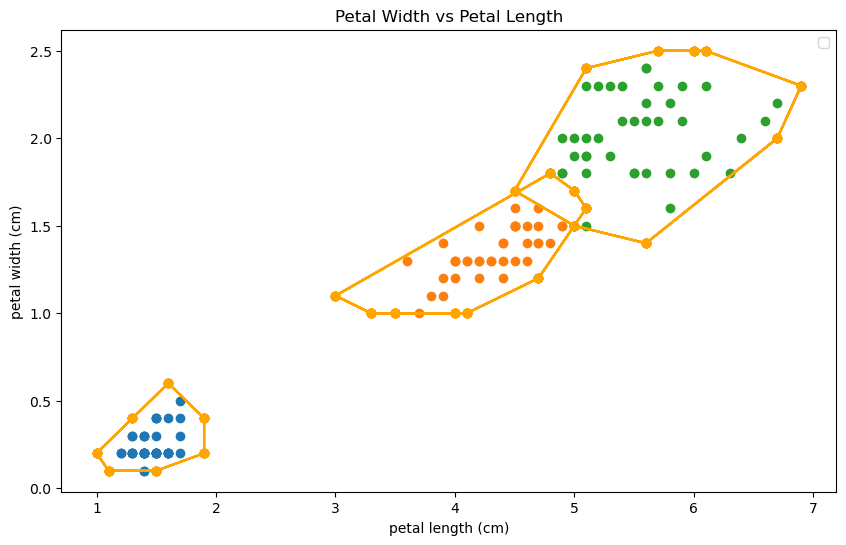

In [16]:
#testando envoltoria com matriz inteira
plt.clf()
plt.figure(figsize = (10, 6))
names = iris.target_names
label = (iris.target).astype(np.int)
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
for i in range(len(names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    bucket_points = [Ponto(x, y) for x, y in bucket]
    envoltoria = gift_wrapping(bucket_points)
    Xs1 = [ponto.x for ponto in bucket_points]
    Ys1 = [ponto.y for ponto in bucket_points]
    plt.scatter(Xs1, Ys1)
    Xs2 = [ponto.x for ponto in envoltoria]
    Ys2 = [ponto.y for ponto in envoltoria]
    Xs2.append(envoltoria[0].x)
    Ys2.append(envoltoria[0].y)
    for j in envoltoria:
        plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')
plt.legend()
plt.show()